*DATA PREPARATION (DSC540-T301)*
**WEEK 3 & 4**
***DANIEL SOLIS TORO***

**The Data Wrangling Workshop: ACTIVITY 3.01: GENERATING STATISTICS FROM A CSV FILE**
Suppose you are working with the Boston Housing price dataset. This dataset is famous in the machine learning community. Many regression problems can be formulated, and machine learning algorithms can be run on this dataset. You will perform a basic data wrangling activity (including plotting some trends) on this dataset (.csv file) by reading it as a pandas DataFrame. We will perform a few statistical operations on this DataFrame.

First 10 records:
       CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222     18.7   
5  0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222     18.7   
6  0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311     15.2   
7  0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311     15.2   
8  0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5  311     15.2   
9  0.17004  12.5   7.87     0  0.524  6.004   85.9  6.5921    5  311     15.2   

        B  LSTAT  PRICE  
0  396.90   4.98   24.0  
1  396.90   9.14   21.6  
2  392.83  

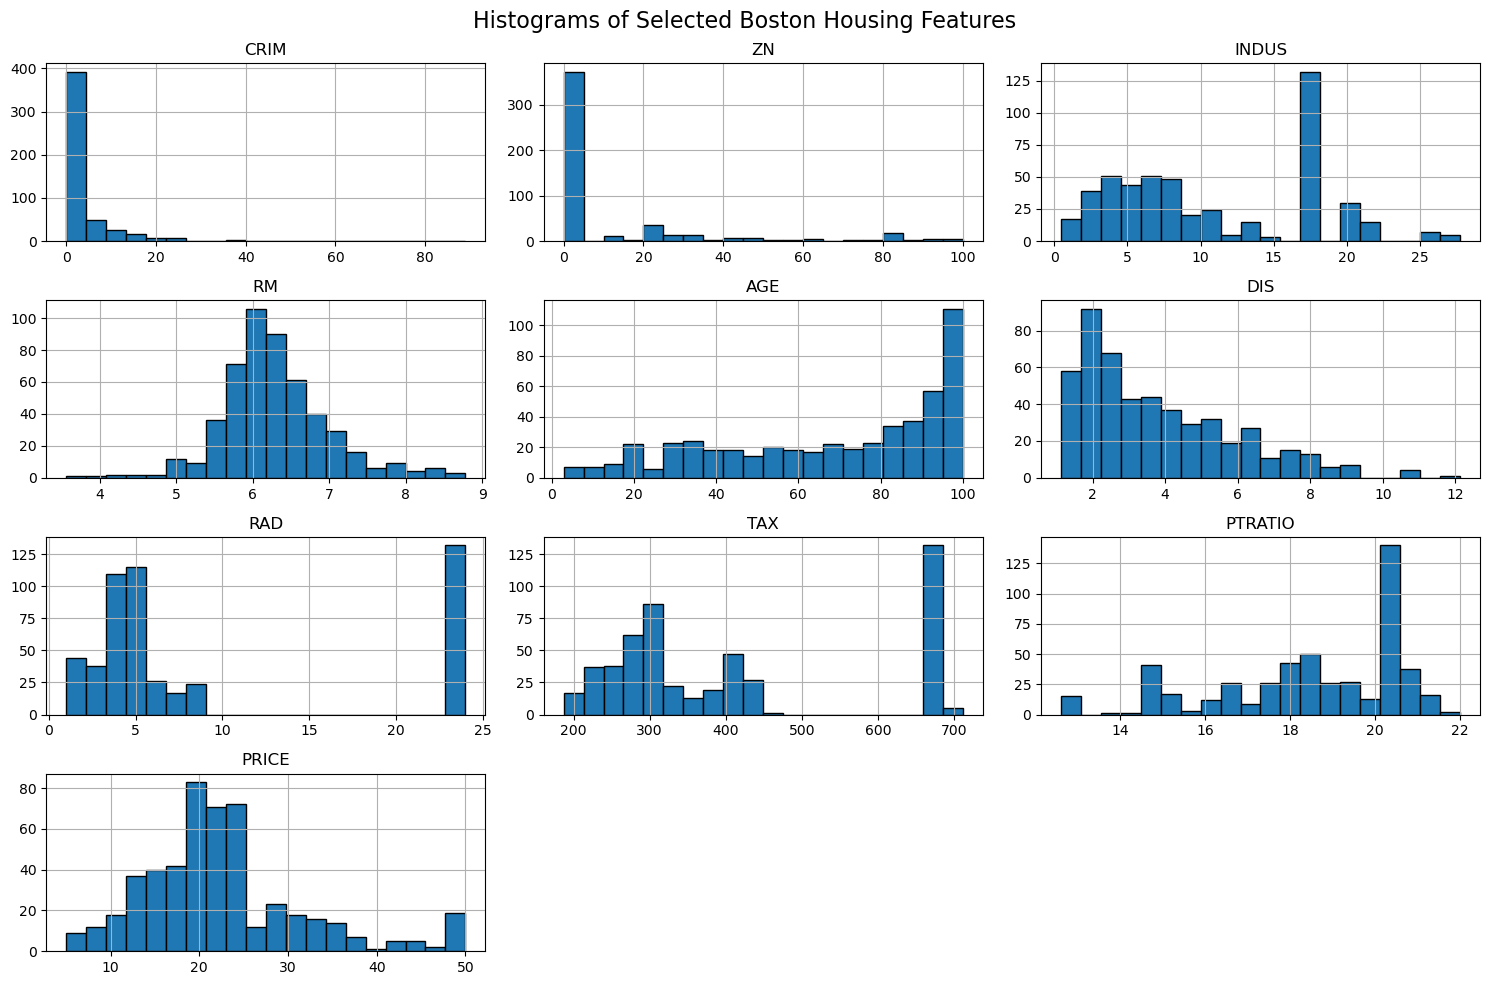

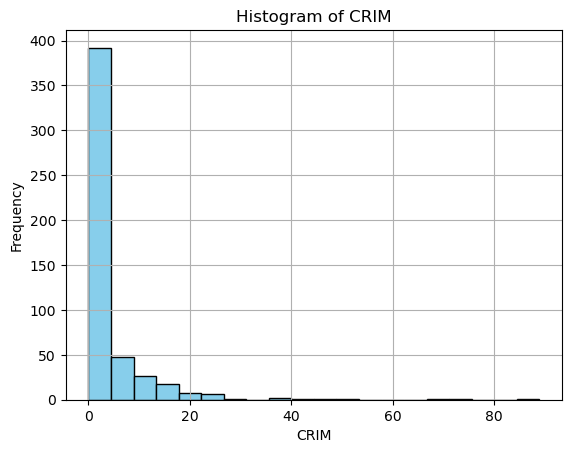

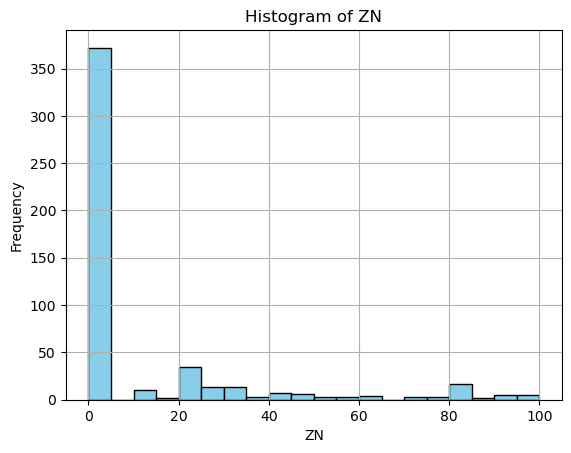

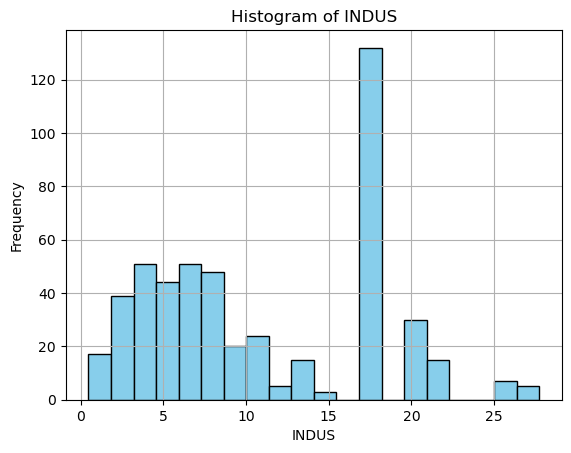

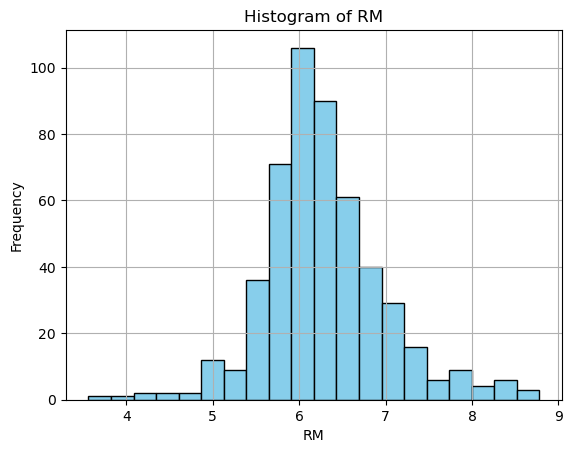

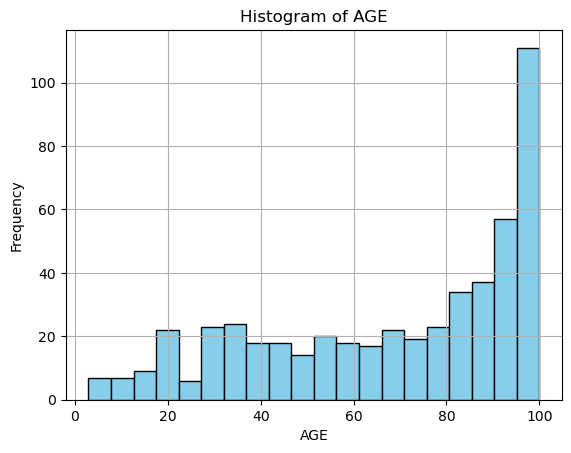

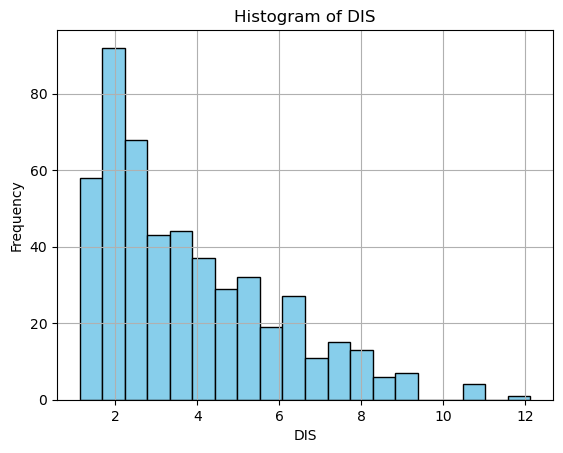

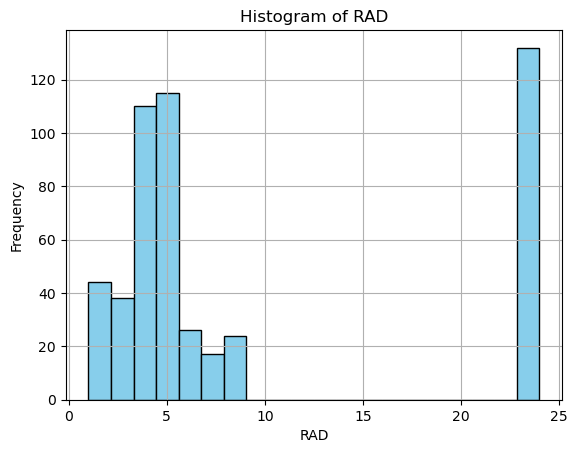

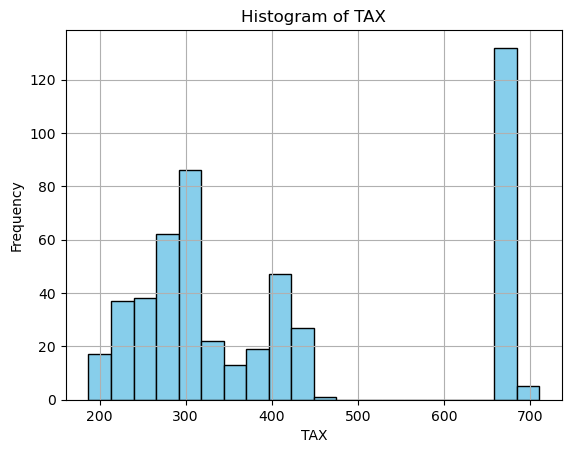

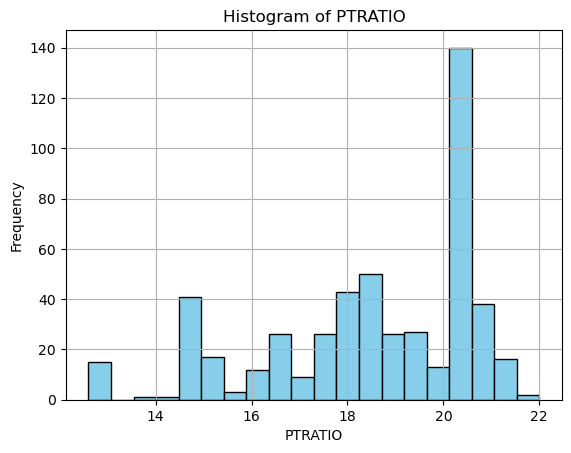

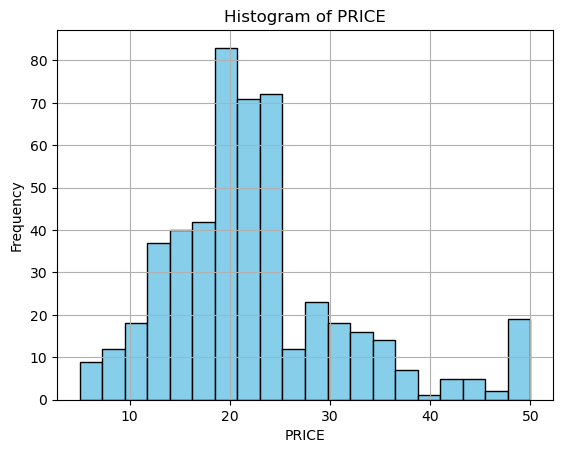

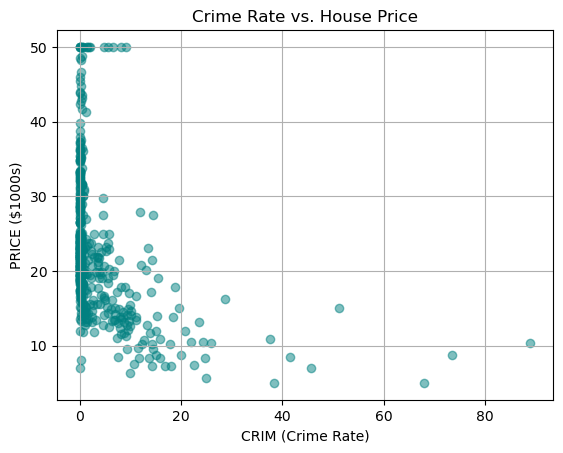

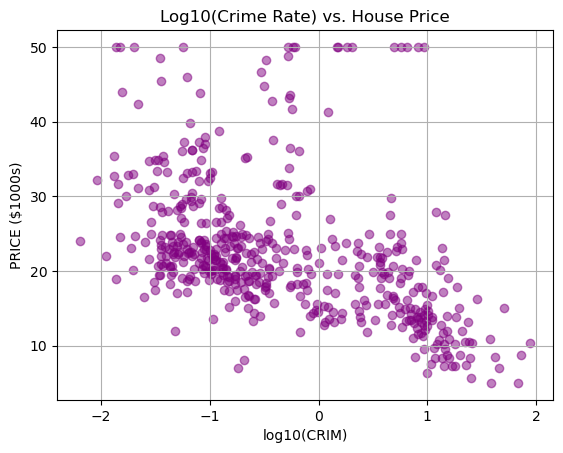

Mean rooms per dwelling: 6.284634387351779
Median age: 77.5
Mean distances to five Boston employment centers: 3.795042687747036
Percentage of houses with a low price (<$20,000): 41.50197628458498


In [143]:
# Step 1: Load the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 2: Read the Boston Housing dataset 
df = pd.read_csv('Boston_Housing.csv')  

# Step 3: Check the first 10 records
print("First 10 records:\n", df.head(10))

# Step 4: Find the total number of records
print("\nTotal number of records:", len(df))

# Step 5: Create a smaller DataFrame without CHAS, NOX, B, and LSTAT
df_small = df.drop(columns=["CHAS", "NOX", "B", "LSTAT"])

# Step 6: Check the last seven records of the new DataFrame
print("\nLast 7 records of the smaller DataFrame:\n", df_small.tail(7))

# Step 7: Plot histograms of all variables in the new DataFrame
df_small.hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.suptitle('Histograms of Selected Boston Housing Features', fontsize=16)
plt.tight_layout()
plt.show()

# Step 8: Plot all histograms individually in a for loop with unique titles
for column in df_small.columns:
    plt.figure()
    plt.hist(df_small[column], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Step 9: Scatter plot of crime rate vs. price
plt.figure()
plt.scatter(df['CRIM'], df['PRICE'], alpha=0.5, color='teal')
plt.title('Crime Rate vs. House Price')
plt.xlabel('CRIM (Crime Rate)')
plt.ylabel('PRICE ($1000s)')
plt.grid(True)
plt.show()

# Step 10: Scatter plot of log10(crime) vs. price
plt.figure()
plt.scatter(np.log10(df['CRIM'] + 1e-5), df['PRICE'], alpha=0.5, color='purple')  # add epsilon to avoid log(0)
plt.title('Log10(Crime Rate) vs. House Price')
plt.xlabel('log10(CRIM)')
plt.ylabel('PRICE ($1000s)')
plt.grid(True)
plt.show()

# Step 11: Calculate statistics
mean_rooms = df['RM'].mean()
median_age = df['AGE'].median()
mean_distance = df['DIS'].mean()
low_price_pct = (df['PRICE'] < 20).sum() / len(df) * 100

# Print the results
print(f"Mean rooms per dwelling: {mean_rooms}")
print(f"Median age: {median_age}")
print(f"Mean distances to five Boston employment centers: {mean_distance}")
print(f"Percentage of houses with a low price (<$20,000): {low_price_pct}")


**The Data Wrangling Workshop: ACTIVITY 4.0: WORKING WITH THE ADULT INCOME DATASET (UCI)**

In this activity, we will detect outliers in the Adult Income Dataset from the UCI machine learning portal.

We will use the concepts we've learned throughout this chapter, such as subsetting, applying user-defined functions, summary statistics, visualizations, boolean indexing, and group by to find a whole group of outliers in a dataset. We will create a bar plot to plot this group of outliers. Finally, we will merge two datasets by using a common key.

Could not load from URL, trying local file...

First 5 lines of data:
   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship    race   sex  \
0       Never-married       Adm-clerical  Not-in-family    Male  2174   
1  Married-civ-spouse    Exec-managerial        Husband    Male     0   
2            Divorced  Handlers-cleaners  Not-in-family    Male     0   
3  Married-civ-spouse  Handlers-cleaners        Husband    Male     0   
4  Married-civ-spouse     Prof-specialty           Wife  Female     0   

   capital-gain  capital-loss  hours-per-week native-country  income  
0             0            40             NaN  

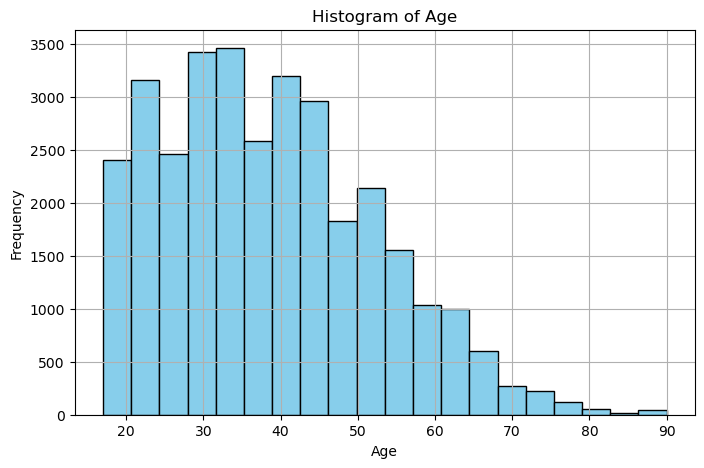


Number of people aged between 30 and 50: 16390

Mean age by education:
 education
10th            37.429796
11th            32.355745
12th            32.000000
1st-4th         46.142857
5th-6th         42.885886
7th-8th         48.445820
9th             41.060311
Assoc-acdm      37.381443
Assoc-voc       38.553546
Bachelors       38.904949
Doctorate       47.702179
HS-grad         38.974479
Masters         44.049913
Preschool       42.764706
Prof-school     44.746528
Some-college    35.756275
Name: age, dtype: float64

Age summary statistics by occupation:
                     count       mean        std   min   25%   50%   75%   max
occupation                                                                   
?                  1843.0  40.882800  20.336350  17.0  21.0  35.0  61.0  90.0
Adm-clerical       3770.0  36.964456  13.362998  17.0  26.0  35.0  46.0  90.0
Armed-Forces          9.0  30.222222   8.089774  23.0  24.0  29.0  34.0  46.0
Craft-repair       4099.0  39.031471  11.6064

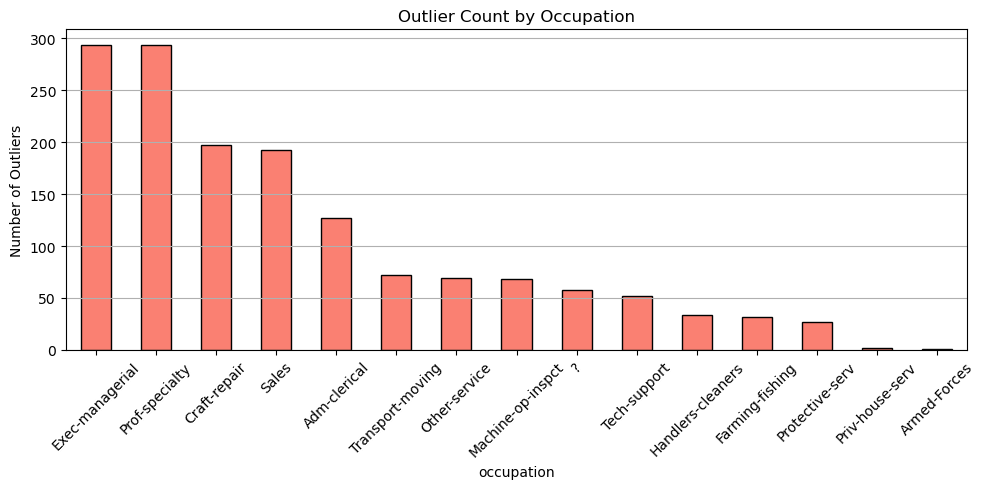


Merged DataFrame shape: (686137, 16)
Shape after dropping duplicates: (32536, 16)

Final DataFrame sample:
    age         workclass  fnlwgt  education  education-num  \
0    39         State-gov   77516  Bachelors             13   
17   50  Self-emp-not-inc   83311  Bachelors             13   
55   38           Private  215646    HS-grad              9   
66   53           Private  234721       11th              7   
67   28           Private  338409  Bachelors             13   

        marital-status         occupation   relationship    race   sex  \
0        Never-married       Adm-clerical  Not-in-family    Male  2174   
17  Married-civ-spouse    Exec-managerial        Husband    Male     0   
55            Divorced  Handlers-cleaners  Not-in-family    Male     0   
66  Married-civ-spouse  Handlers-cleaners        Husband    Male     0   
67  Married-civ-spouse     Prof-specialty           Wife  Female     0   

    capital-gain  capital-loss  hours-per-week native-country  Incom

In [145]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 2: Read the Adult Income dataset
# Define column names
column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num',
    'marital-status', 'occupation', 'relationship', 'race', 'sex',
    'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'
]

# Try loading from URL, fall back to local file if needed
try:
    url = "https://github.com/PacktWorkshops/The-Data-Wrangling-Workshop/blob/master/Chapter04/datasets/adult_income_data.csv"
    df = pd.read_csv(url, names=column_names, na_values=" ?", skipinitialspace=True)
except:
    print("Could not load from URL, trying local file...")
    df = pd.read_csv('adult_income_data.csv', names=column_names, na_values=" ?", skipinitialspace=True)

# Convert numeric columns (fix for TypeError)
numeric_cols = ['age', 'capital-gain', 'capital-loss', 'hours-per-week', 'education-num']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Step 3: Display first 5 records
print("\nFirst 5 lines of data:")
print(df.head())

# Step 4: Rename response variable to "Income"
df.rename(columns={'income': 'Income'}, inplace=True)

# Step 5: Check for missing values
print("\nMissing values per column:\n", df.isnull().sum())

# Step 6: Create subset with only age, education, and occupation
subset_df = df[['age', 'education', 'occupation']].copy()

# Step 7: Plot histogram of age
plt.figure(figsize=(8, 5))
plt.hist(df['age'], bins=20, edgecolor='black', color='skyblue')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Step 8: Function to strip whitespaces
def strip_whitespace(x):
    return x.strip() if isinstance(x, str) else x

# Step 9: Apply the function to all string columns
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].apply(strip_whitespace)

# Step 10: Count people aged between 30 and 50
count_30_50 = df[(df['age'] >= 30) & (df['age'] <= 50)].shape[0]
print("\nNumber of people aged between 30 and 50:", count_30_50)

# Step 11: Group by education and compute mean age
mean_age_by_edu = df.groupby('education')['age'].mean()
print("\nMean age by education:\n", mean_age_by_edu)

# Step 12: Summary statistics by occupation
occupation_stats = df.groupby('occupation')['age'].describe()
print("\nAge summary statistics by occupation:\n", occupation_stats)

# Occupation with the highest average age
oldest_profession = occupation_stats['mean'].idxmax()
print("\nOccupation with the oldest average age:", oldest_profession)

# Occupation with the largest share above the 75th age percentile
age_75 = df['age'].quantile(0.75)
above_75_df = df[df['age'] > age_75]
most_above_75 = above_75_df['occupation'].value_counts(normalize=True).idxmax()
print("Occupation with the largest share above 75th percentile:", most_above_75)

# Step 13: Find outliers (high capital gain or long work hours)
outliers_df = df[
    (df['capital-gain'] > df['capital-gain'].quantile(0.95)) |
    (df['hours-per-week'] > df['hours-per-week'].quantile(0.95))
]

# Group outliers by occupation
outlier_counts = outliers_df['occupation'].value_counts()

# Step 14: Plot outliers in a bar chart
plt.figure(figsize=(10, 5))
outlier_counts.plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Outlier Count by Occupation')
plt.ylabel('Number of Outliers')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Step 15: Merge the two DataFrames and drop duplicates
# Create a processed version of the subset
processed_subset = subset_df.copy()
processed_subset['processed'] = True

# Merge with original data
merged_df = pd.merge(
    df,
    processed_subset,
    on=['age', 'education', 'occupation'],
    how='left'
)

print("\nMerged DataFrame shape:", merged_df.shape)

# Drop duplicates
merged_df = merged_df.drop_duplicates()
print("Shape after dropping duplicates:", merged_df.shape)

# Show final result
print("\nFinal DataFrame sample:")
print(merged_df.head())


**The Data Wrangling Workshop: ACTIVITY 5.01: READING TABULAR DATA FROM A WEB PAGE AND CREATING DATAFRAMES** 

In this activity, you have been given a Wikipedia page where you have the GDP of all countries listed. You have to create three DataFrames from the three sources mentioned on the page.

In [148]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

headers = {'User-Agent': 'Mozilla/5.0'}

try:
    # Fetch the page
    url = "https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)"
    response = requests.get(url, headers=headers)
    response.raise_for_status()
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Find the main GDP table
    table = soup.find('table', {'class': 'wikitable'})
    
    if not table:
        raise ValueError("GDP table not found")
    
    # Extract headers
    header_rows = table.find_all('tr')[:2]
    sources = ['IMF', 'World Bank', 'UN']
    
    # Correct column mapping
    columns = ['Country']
    for source in sources:
        columns.extend([f"{source} GDP", f"{source} Year"])  # Changed order
    
    # Extract data rows
    rows = []
    for row in table.find_all('tr')[2:]:
        cells = [cell.get_text(strip=True) for cell in row.find_all(['td', 'th'])]
        if len(cells) >= 7:
            # Reorder columns: Country, IMF GDP, IMF Year, WB GDP, WB Year, UN GDP, UN Year
            rows.append([cells[0], cells[1], cells[2], cells[3], cells[4], cells[5], cells[6]])
    
    # Create DataFrame
    df = pd.DataFrame(rows, columns=columns)
    
    # Clean and convert data
    for source in sources:
        gdp_col = f"{source} GDP"
        year_col = f"{source} Year"
        
        # Clean GDP values
        df[gdp_col] = df[gdp_col].str.replace(r'\[.*\]', '', regex=True)
        df[gdp_col] = df[gdp_col].str.replace(',', '').str.replace('$', '')
        df[gdp_col] = pd.to_numeric(df[gdp_col], errors='coerce')
        
        # Clean Year values
        df[year_col] = df[year_col].str.extract(r'(\d{4})')[0]  # Extract just the year
    
    # Create separate DataFrames for each source
    dataframes = {}
    for source in sources:
        source_df = df[['Country', f"{source} GDP", f"{source} Year"]].copy()
        source_df.columns = ['Country', 'GDP (US$)', 'Year']
        dataframes[source] = source_df
    
    # Display results
    for source, df in dataframes.items():
        print(f"\n=== {source} GDP Data ===")
        print(df.head())

except Exception as e:
    print(f"Error: {e}")


=== IMF GDP Data ===
         Country  GDP (US$)  Year
0          World  113795678  2025
1  United States   30507217  2025
2          China   19231705  2025
3        Germany    4744804  2025
4          India    4187017  2025

=== World Bank GDP Data ===
         Country  GDP (US$)  Year
0          World  105435540  2023
1  United States   27360935  2023
2          China   17794782  2023
3        Germany    4456081  2023
4          India    3549919  2023

=== UN GDP Data ===
         Country  GDP (US$)  Year
0          World  100834796  2022
1  United States   27720700  2023
2          China   17794782  2023
3        Germany    4525704  2023
4          India    3575778  2023


**The Data Wrangling Workshop: ACTIVITY 6.01: HANDLING OUTLIERS AND MISSING DATA**

In this activity, we will identify and get rid of outliers. Here, we have a CSV file. The goal is to clean the data by using the knowledge we have learned so far and come up with a nicely formatted DataFrame. Identify the type of outliers and their effect on the data and clean the messy data.

Initial size: 1000 rows
After removing missing visits: 974 rows


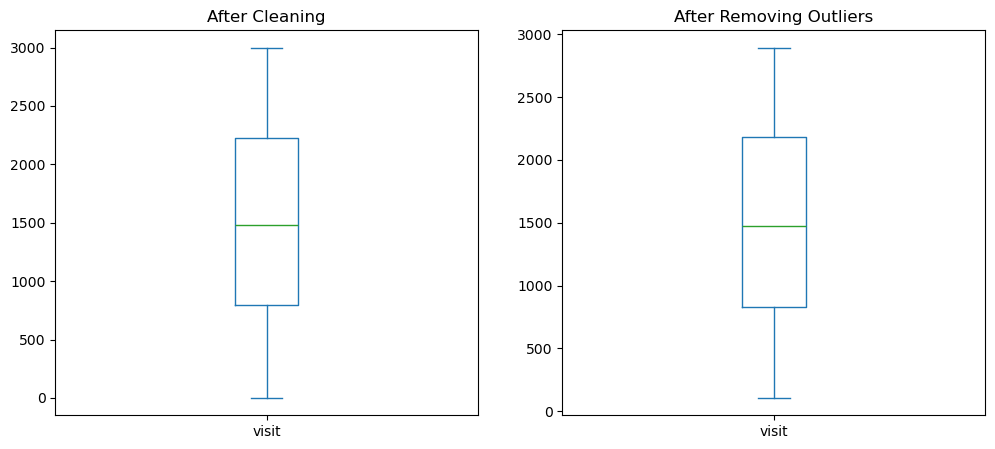


After removing outliers: 923 rows


In [152]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('visit_data.csv')
print(f"Initial size: {len(df)} rows")

# 1. Remove missing visit data
clean_df = df.dropna(subset=['visit'])
print(f"After removing missing visits: {len(clean_df)} rows")

# 2. Visual confirmation
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
clean_df['visit'].plot(kind='box')
plt.title('After Cleaning')

# 3. Remove outliers based on the plot
final_df = clean_df[(clean_df['visit'] >= 100) & (clean_df['visit'] <= 2900)]
plt.subplot(1, 2, 2)
final_df['visit'].plot(kind='box')
plt.title('After Removing Outliers')
plt.show()
print(f"\nAfter removing outliers: {len(final_df)} rows")

**SERIES ACTIVITY**
Create a series and practice basic arithmetic steps:
Series 1 = 7.3, -2.5, 3.4, 1.5
Index = ‘a’, ‘c’, ‘d’, ‘e’
Series 2 = -2.1, 3.6, -1.5, 4, 3.1
Index = ‘a’, ‘c’, ‘e’, ‘f’, ‘g’
Add Series 1 and Series 2 together and print the results
Subtract Series 1 from Series 2 and print the results


In [155]:
import pandas as pd

# Create Series 1
series1 = pd.Series([7.3, -2.5, 3.4, 1.5], index=['a', 'c', 'd', 'e'])

# Create Series 2
series2 = pd.Series([-2.1, 3.6, -1.5, 4, 3.1], index=['a', 'c', 'e', 'f', 'g'])

# Add Series 1 and Series 2
sum_series = series1 + series2
print("Addition Result:\n", sum_series)

# Subtract Series 1 from Series 2
sub_series = series2 - series1
print("\nSubtraction Result:\n", sub_series)


Addition Result:
 a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64

Subtraction Result:
 a   -9.4
c    6.1
d    NaN
e   -3.0
f    NaN
g    NaN
dtype: float64


**SQL Lite Activity**: 
Insert data into a SQL Lite database – create a table with the following data below that you will create yourself:
a. Name, Address, City, State, Zip, Phone Number
b. Add at least 10 rows of data and submit your code with a query generating your results.

In [158]:
import sqlite3
import pandas as pd

# Create a connection to a SQLite database in memory (or use a file: 'mydata.db')
conn = sqlite3.connect(':memory:')
cursor = conn.cursor()

# Create the table
cursor.execute('''
    CREATE TABLE contacts (
        Name TEXT,
        Address TEXT,
        City TEXT,
        State TEXT,
        Zip TEXT,
        PhoneNumber TEXT
    )
''')

# Insert 10 rows of data
data = [
    ('Alice Smith', '123 Maple St', 'Springfield', 'IL', '62701', '217-555-1234'),
    ('Bob Johnson', '456 Oak Ave', 'Chicago', 'IL', '60601', '312-555-5678'),
    ('Carol Davis', '789 Pine Rd', 'Naperville', 'IL', '60540', '630-555-9101'),
    ('David Wilson', '135 Cedar Dr', 'Peoria', 'IL', '61602', '309-555-2233'),
    ('Evelyn Miller', '246 Elm St', 'Evanston', 'IL', '60201', '847-555-3344'),
    ('Frank Brown', '357 Birch Ln', 'Rockford', 'IL', '61101', '815-555-4455'),
    ('Grace Clark', '468 Spruce Blvd', 'Joliet', 'IL', '60431', '779-555-5566'),
    ('Henry Lewis', '579 Aspen Way', 'Aurora', 'IL', '60505', '331-555-6677'),
    ('Irene Martinez', '680 Redwood Ct', 'Elgin', 'IL', '60120', '847-555-7788'),
    ('Jack Moore', '791 Sycamore Pl', 'Bloomington', 'IL', '61701', '309-555-8899'),
]

cursor.executemany('INSERT INTO contacts VALUES (?, ?, ?, ?, ?, ?)', data)
conn.commit()

# Query the data
df = pd.read_sql_query("SELECT * FROM contacts", conn)

# Display the results
print(df)

# Close the connection when done
conn.close()

             Name          Address         City State    Zip   PhoneNumber
0     Alice Smith     123 Maple St  Springfield    IL  62701  217-555-1234
1     Bob Johnson      456 Oak Ave      Chicago    IL  60601  312-555-5678
2     Carol Davis      789 Pine Rd   Naperville    IL  60540  630-555-9101
3    David Wilson     135 Cedar Dr       Peoria    IL  61602  309-555-2233
4   Evelyn Miller       246 Elm St     Evanston    IL  60201  847-555-3344
5     Frank Brown     357 Birch Ln     Rockford    IL  61101  815-555-4455
6     Grace Clark  468 Spruce Blvd       Joliet    IL  60431  779-555-5566
7     Henry Lewis    579 Aspen Way       Aurora    IL  60505  331-555-6677
8  Irene Martinez   680 Redwood Ct        Elgin    IL  60120  847-555-7788
9      Jack Moore  791 Sycamore Pl  Bloomington    IL  61701  309-555-8899
